In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # font 설정
from sklearn.model_selection import train_test_split
import seaborn as sns
 
######## 한글 폰트 사용을 위한 설정 ######## 
font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정 

# 1. 데이터 로드
data = pd.read_csv('../data/before_scaling.csv')

X = data.iloc[:, :-3]

# G1, G2, G3 평균 = target 데이터
last3 = data.iloc[:, -3:]
y = last3.mean(axis=1)
 
df = pd.DataFrame(data=X)
df['target'] = y

df

# X, y 데이터 준비 (target 컬럼 제외한 숫자형 데이터만)
X = df.drop(columns=['target'])
y = df['target']


In [2]:
# 데이터프레임 컬럼 정보 확인
print(f"전체 컬럼 수: {len(df.columns)}")
print(f"피처 컬럼 수 (target 제외): {len(df.columns[:-1])}")
print("컬럼명:", df.columns.tolist())

# 데이터 타입 확인
print("각 컬럼의 데이터 타입:")
print(df.dtypes)
print("\n문자열 타입 컬럼들:")
string_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
print(string_cols)

전체 컬럼 수: 29
피처 컬럼 수 (target 제외): 28
컬럼명: ['school_GP', 'school_MS', 'fromCity', 'sex', 'age', 'famMore3', 'liveTogether', 'Medu', 'Fedu', 'noParent', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'target']
각 컬럼의 데이터 타입:
school_GP         int64
school_MS         int64
fromCity          int64
sex               int64
age               int64
famMore3          int64
liveTogether      int64
Medu              int64
Fedu              int64
noParent          int64
traveltime        int64
studytime         int64
failures          int64
schoolsup         int64
famsup            int64
paid              int64
activities        int64
nursery           int64
higher            int64
internet          int64
romantic          int64
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
heal

In [11]:
# 학습용, 테스트용 데이터 분리 함수
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

---
### 선형 회귀

선형 회귀 MSE: 7.1292
선형 회귀 R²: 0.1963

회귀 계수:
         feature  coefficient
9       noParent     1.143896
19      internet     0.763630
11     studytime     0.436291
3            sex     0.411127
18        higher     0.380040
8           Fedu     0.348223
0      school_GP     0.300971
2       fromCity     0.286161
16    activities     0.144788
7           Medu     0.142076
10    traveltime     0.117636
20      romantic     0.066304
21        famrel     0.063189
24          Dalc     0.056384
22      freetime     0.050855
27      absences    -0.052848
4            age    -0.155659
26        health    -0.174521
23         goout    -0.243715
17       nursery    -0.263696
15          paid    -0.281210
25          Walc    -0.289536
1      school_MS    -0.300971
6   liveTogether    -0.366029
5       famMore3    -0.470371
14        famsup    -0.979986
12      failures    -1.018842
13     schoolsup    -2.311689


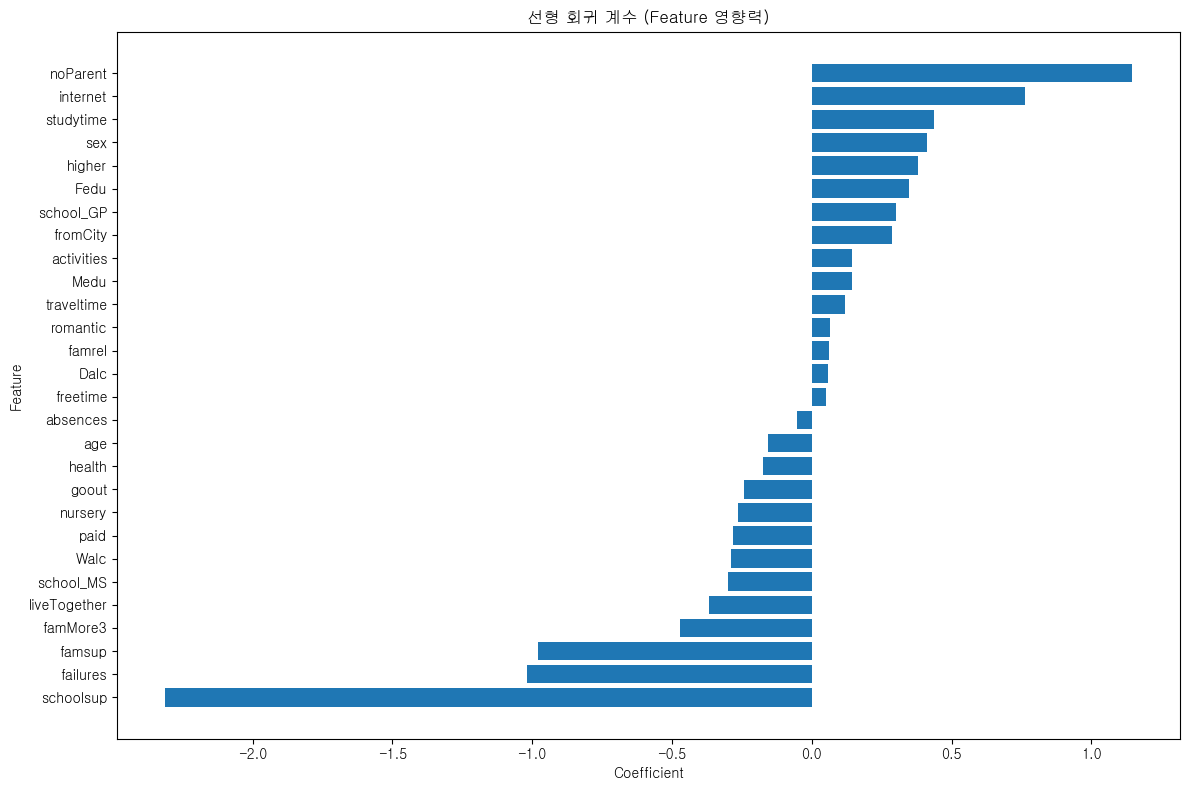

In [ ]:
# 스케일링 전 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = split_data(X, y)

# 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"선형 회귀 MSE: {mse:.4f}")
print(f"선형 회귀 R²: {r2:.4f}")

# 회귀 계수 데이터프레임 생성
coeff_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_
}).sort_values(by="coefficient", ascending=False)

print("\n회귀 계수:")
print(coeff_df)

# 시각화
plt.figure(figsize=(12,8))
plt.barh(coeff_df["feature"], coeff_df["coefficient"])
plt.title("선형 회귀 계수 (Feature 영향력)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

- 양수 계수: 값이 커질수록 성취도가 올라가는 요인.
- 음수 계수: 값이 커질수록 성취도가 떨어지는 요인.

계수 크기가 클수록 영향력이 큼.

숫자형 피처 개수: 28


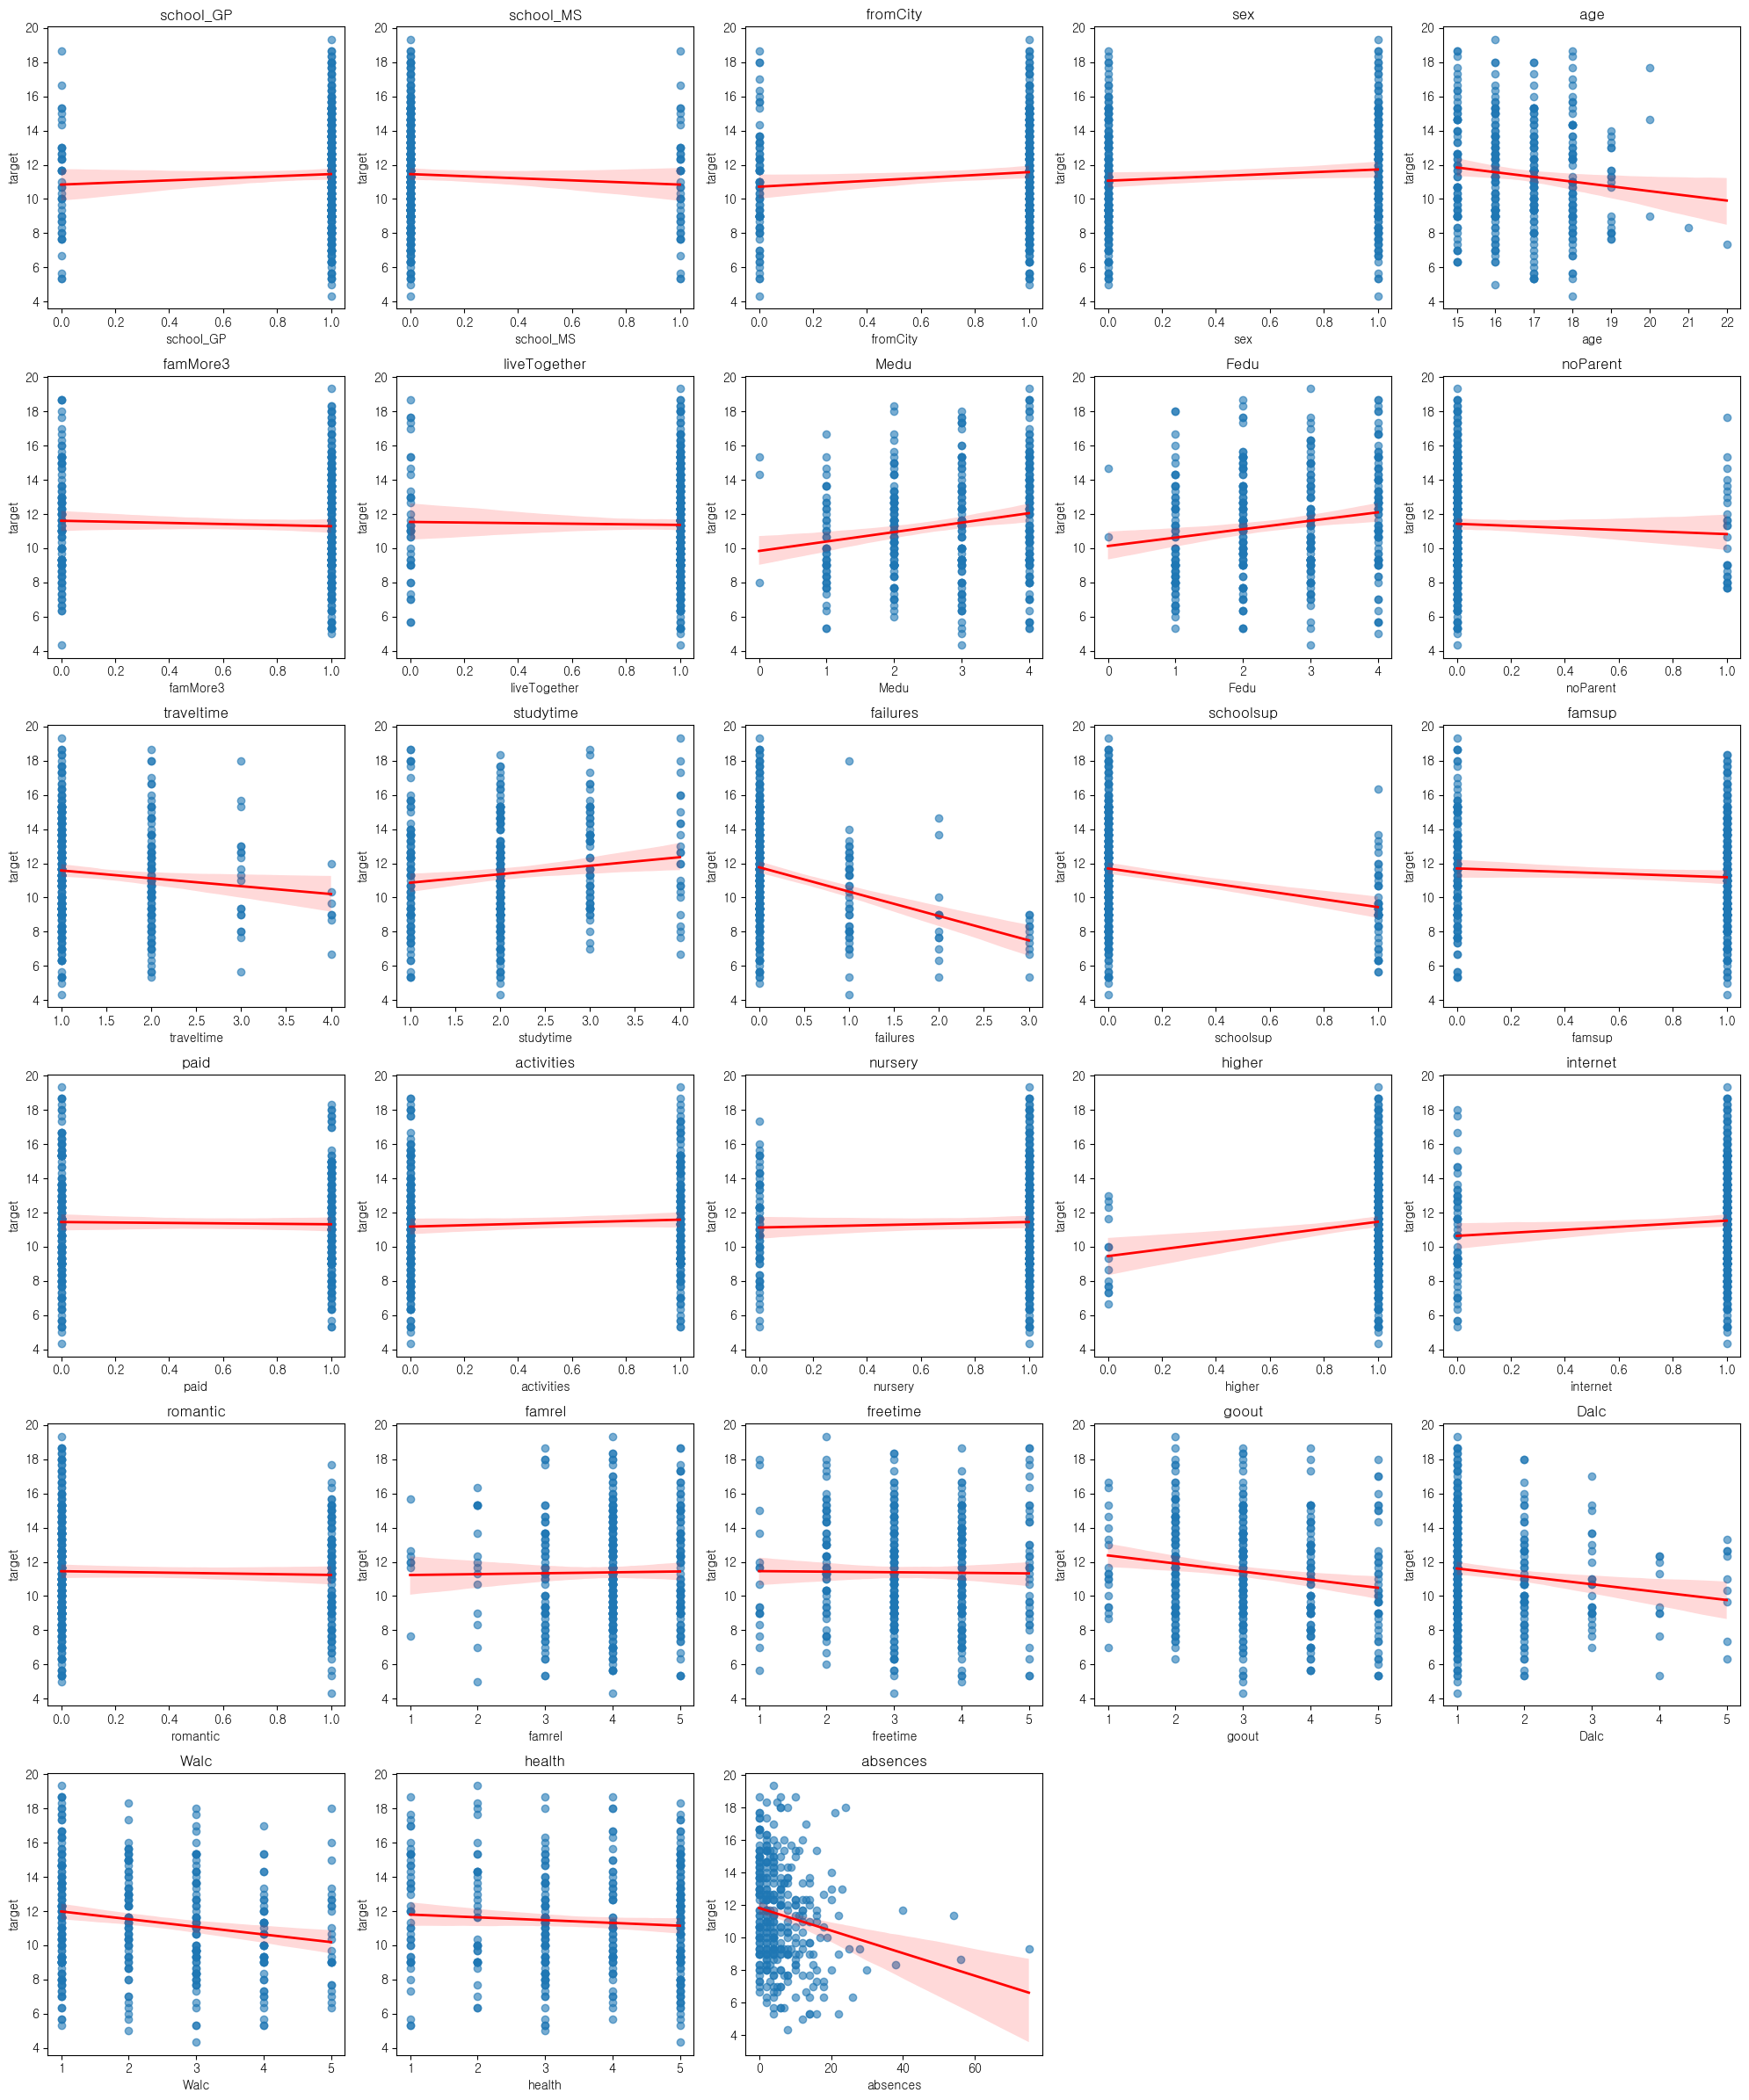

In [13]:
# 숫자형 컬럼만 선택 (target과 grade_label 제외)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# target, grade_label 제거
feature_cols = [col for col in numeric_cols if col not in ['target', 'grade_label']]

n_features = len(feature_cols)
print(f"숫자형 피처 개수: {n_features}")

# 6x5 = 30개 서브플롯 생성
fig, ax = plt.subplots(figsize=(20,24), ncols=5, nrows=6)

for i, col_name in enumerate(feature_cols):
    row = i // 5  # 행 위치
    col_idx = i % 5  # 열 위치
    ax_temp = ax[row][col_idx]  # 2차원 배열에서 각 그래프의 위치 지정
 
    try:
        # 회귀선 그리기
        sns.regplot(data=df, x=col_name, y='target', ax=ax_temp, 
                   line_kws={'color':'red', 'linewidth':2}, 
                   scatter_kws={'alpha':0.6})
        ax_temp.set_title(f'{col_name}')
        ax_temp.set_xlabel(col_name)
        ax_temp.set_ylabel('target')
    except Exception as e:
        print(f"Error plotting {col_name}: {e}")
        ax_temp.text(0.5, 0.5, f'Error: {col_name}', 
                    transform=ax_temp.transAxes, ha='center', va='center')

# 사용하지 않는 서브플롯 숨기기
for i in range(n_features, 6*5):
    row = i // 5
    col_idx = i % 5
    ax[row][col_idx].set_visible(False)

plt.tight_layout()
plt.show()

## [ 결과 ]
### 1. 크게 유의미하지 않은 변수들

- 학교(school_GP, school_MS), 성별(sex), 가족규모(famsize), 인터넷 사용(internet), 과외(paid), 활동(activities), 연애관계(romantic) 등은 성적과 거의 직선적 관계가 없음.
- 이 요인들은 학생 성적에 뚜렷한 영향이 없는 것으로 해석할 수 있다.

### 2. 성적과 음의 상관관계가 있는 변수들

- `나이(age)`: 나이가 많을수록 성적이 낮아지는 경향을 보임.
- `실패횟수(failures)`: 실패 경험이 많을수록 성적이 확실히 낮음.
- `결석(absences)`: 결석일수가 많을수록 성적이 크게 떨어지는 경향을 보임.
- `Walc(주말 음주)`: 주말 술을 많이 마시는 학생일수록 성적이 낮음.
- `Dalc(평일 음주)`: 평일 술을 마시는 학생도 성적이 낮은 경향이 있음.
- `**health(건강상태)**` 는 오히려 약간 부정적 경향—건강 점수가 높을수록 성적이 살짝 떨어지는 경향이 있는데, 이는 단순 상관관계 이상일 수 있음(예: 건강문제가 심하지 않은 학생들이 오히려 공부에 집중하는 경우).

### 3. 성적과 양의 상관관계가 있는 변수들

- 교육지원(famsup), 학교지원(schoolsup): 약간의 양의 상관이 보이지만 크지는 않음.
- higher(고등교육 희망 여부): 대학 진학 희망이 있는 학생일수록 성적이 높은 편.
- Medu, Fedu(부모 교육 수준): 부모 학력이 높을수록 학생 성적도 올라가는 경향이 보임.

### 4. 중요한 요인 요약

- 강한 영향 (직접적 상관관계 뚜렷): 실패횟수(failures), 결석(absences), 나이(age), 음주(Dalc/Walc).
- 중간 정도 영향: 부모 학력, 고등교육 희망 여부(higher).
- 거의 영향 없음: 성별, 활동 여부, 인터넷 사용 등.

### ✅ 종합 해석:
학생들의 성적은 **학업적 습관(결석, 실패 경험), 생활습관(음주), 연령, 교육적 태도(고등교육 의지)** 에 의해 크게 좌우되며, 성별이나 단순한 가족 요인, 인터넷 사용 여부 등은 거의 영향을 주지 않음을 알 수 있다.

---
## 라쏘 회귀(교차검증으로 최적 알파 찾기)

최적 alpha 값: 0.09380526959688604
테스트 세트 MSE(평균 제곱 오차): 6.7800
테스트 세트 R²: 0.2357
         feature  coefficient
19      internet     0.291831
8           Fedu     0.240842
11     studytime     0.233743
3            sex     0.194476
7           Medu     0.147347
22      freetime     0.006583
2       fromCity     0.000000
1      school_MS    -0.000000
9       noParent     0.000000
6   liveTogether    -0.000000
0      school_GP     0.000000
5       famMore3    -0.000000
24          Dalc    -0.000000
10    traveltime    -0.000000
16    activities     0.000000
15          paid    -0.000000
18        higher     0.000000
21        famrel     0.000000
20      romantic     0.000000
17       nursery    -0.000000
4            age    -0.042898
27      absences    -0.048423
26        health    -0.117912
23         goout    -0.177990
25          Walc    -0.236262
14        famsup    -0.493817
12      failures    -0.803681
13     schoolsup    -1.496472


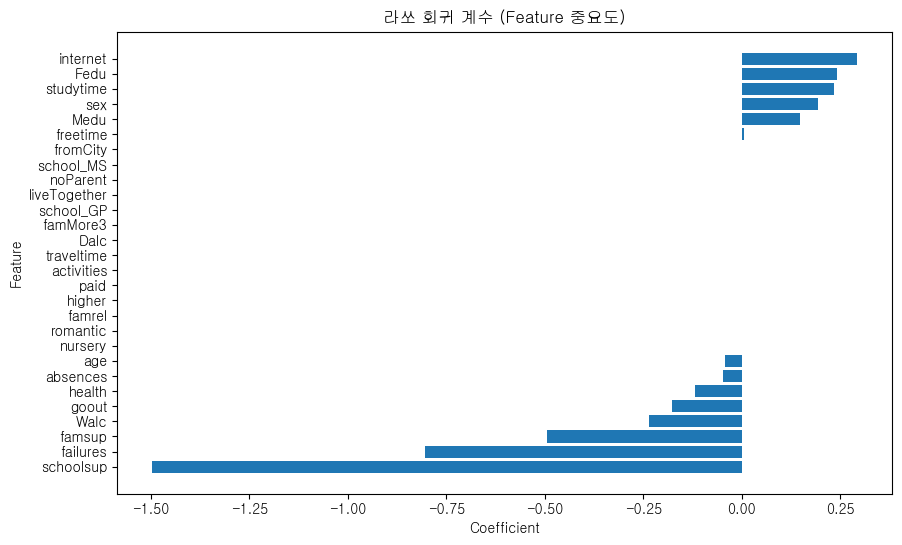

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 

# 1. 라쏘 회귀 (교차검증으로 최적 알파 찾기)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# 2. 예측 및 성능 평가
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("최적 alpha 값:", lasso.alpha_)
print(f"테스트 세트 MSE(평균 제곱 오차): {mse:.4f}")
print(f"테스트 세트 R²: {r2:.4f}")

# 3. 변수 중요도(회귀 계수)
coeff_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lasso.coef_
}).sort_values(by="coefficient", ascending=False)

print(coeff_df)

# 4. 시각화
plt.figure(figsize=(10,6))
plt.barh(coeff_df["feature"], coeff_df["coefficient"])
plt.title("라쏘 회귀 계수 (Feature 중요도)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


---
### 상/중/하로 분류

In [3]:
################ 1. 3등급 분할 (상/중/하) ################

# target 점수 가져오기
scores = df["target"]

# 분위수 기반 구간 나누기 (33%, 66%)
q1 = scores.quantile(1/3)
q2 = scores.quantile(2/3)

#  cut으로 범주 나누기
df["grade"] = pd.cut(
    scores,
    bins=[-np.inf, q1, q2, np.inf],   # 하, 중, 상
    labels=["하", "중", "상"]
)

# 각 그룹 크기 확인
print(df["grade"].value_counts())

grade
하    126
중    117
상    114
Name: count, dtype: int64


In [4]:
################ 2. 라벨 인코딩 (하=0, 중=1, 상=2) ################
from sklearn.preprocessing import LabelEncoder

# 분위수 기준으로 3등급 분할
scores = df["target"]
q1 = scores.quantile(1/3)
q2 = scores.quantile(2/3)

df["grade"] = pd.cut(
    scores,
    bins=[-np.inf, q1, q2, np.inf],
    labels=["하", "중", "상"]
)

print("각 등급 학생 수:")
print(df["grade"].value_counts())

# 라벨 인코딩 (하=0, 중=1, 상=2)
encoder = LabelEncoder()
df["grade_label"] = encoder.fit_transform(df["grade"])

print("\n라벨 인코딩 매핑:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

# X, y 정의
X = df.drop(columns=["target", "grade", "grade_label"])
y = df["grade_label"]


각 등급 학생 수:
grade
하    126
중    117
상    114
Name: count, dtype: int64

라벨 인코딩 매핑:
{'상': np.int64(0), '중': np.int64(1), '하': np.int64(2)}


---
### SVM을 이용한 상/중/하 분류 예측

In [5]:
# SVM 분류 모델 구현
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")
print(f"훈련 데이터 클래스 분포: {pd.Series(y_train).value_counts().sort_index()}")
print(f"테스트 데이터 클래스 분포: {pd.Series(y_test).value_counts().sort_index()}")

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

훈련 데이터 크기: (285, 28)
테스트 데이터 크기: (72, 28)
훈련 데이터 클래스 분포: grade_label
0     91
1     93
2    101
Name: count, dtype: int64
테스트 데이터 클래스 분포: grade_label
0    23
1    24
2    25
Name: count, dtype: int64


In [14]:
# SVM 모델 훈련 (RBF 커널)
svm_model = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred = svm_model.predict(X_test_scaled)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 모델 정확도: {accuracy:.4f}")

# 분류 보고서 출력 (라벨 매핑 적용)
label_mapping = {0: '상', 1: '중', 2: '하'}
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, target_names=['상', '중', '하']))

SVM 모델 정확도: 0.5000

분류 보고서:
              precision    recall  f1-score   support

           상       0.60      0.52      0.56        23
           중       0.33      0.25      0.29        24
           하       0.53      0.72      0.61        25

    accuracy                           0.50        72
   macro avg       0.49      0.50      0.48        72
weighted avg       0.49      0.50      0.49        72



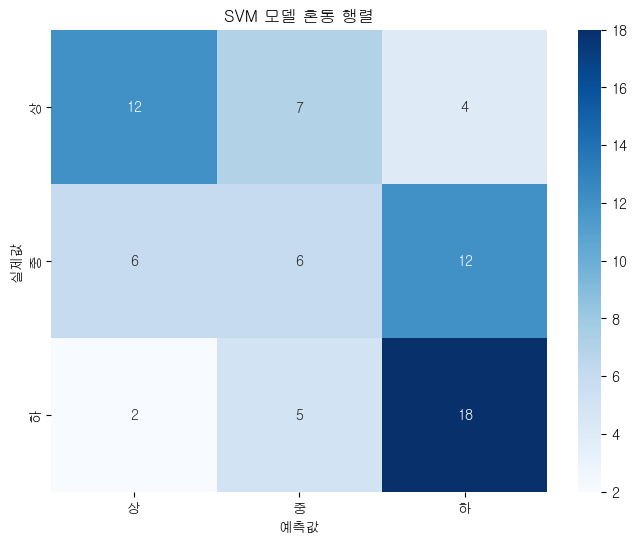

상 등급 예측 정확도: 0.5217
중 등급 예측 정확도: 0.2500
하 등급 예측 정확도: 0.7200


In [7]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['상', '중', '하'],
            yticklabels=['상', '중', '하'])
plt.title('SVM 모델 혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

# 각 클래스별 예측 정확도 계산
for i, label in enumerate(['상', '중', '하']):
    class_accuracy = cm[i, i] / cm[i].sum()
    print(f"{label} 등급 예측 정확도: {class_accuracy:.4f}")

[ 결과 ]

### 각 등급별 성능 분석
- 상 등급 (첫 번째 행):
    - 실제 '상' 23명 중 12명만 올바르게 예측 → 정확도 52.2%
    - 7명은 '중'으로, 4명은 '하'로 잘못 예측
- 중 등급 (두 번째 행):
    - 실제 '중' 24명 중 6명만 올바르게 예측 → 정확도 25.0%
    - 6명은 '상'으로, 12명은 '하'로 잘못 예측 (특히 '하'로 많이 오분류)
- 하 등급 (세 번째 행): 
    - 실제 '하' 25명 중 18명을 올바르게 예측 → 정확도 72.0%
    - 가장 잘 예측하는 등급

[ 결론 ]
상중하 분류는 연속적인 성적을 3개 구간으로 나눈 것이라 경계선 근처의 학생들은 구분하기 어려운 것이 자연스러운 현상

### 다른 분류 알고리즘과의 성능 비교

In [8]:
# 여러 분류 알고리즘 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 모델 정의
models = {
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# 결과 저장할 리스트
results = []

# 각 모델 훈련 및 평가
for name, model in models.items():
    # 모델 훈련
    if name in ['SVM (RBF)', 'Logistic Regression', 'KNN']:
        # 표준화가 필요한 모델들
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # 표준화가 불필요한 모델들
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy
    })
    
    print(f"{name} 정확도: {accuracy:.4f}")

# 결과를 데이터프레임으로 정리
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n모델별 정확도 순위:")
print(results_df)

SVM (RBF) 정확도: 0.5000
Random Forest 정확도: 0.5139
Logistic Regression 정확도: 0.5694
KNN 정확도: 0.5139
Decision Tree 정확도: 0.4444

모델별 정확도 순위:
                 Model  Accuracy
2  Logistic Regression  0.569444
3                  KNN  0.513889
1        Random Forest  0.513889
0            SVM (RBF)  0.500000
4        Decision Tree  0.444444


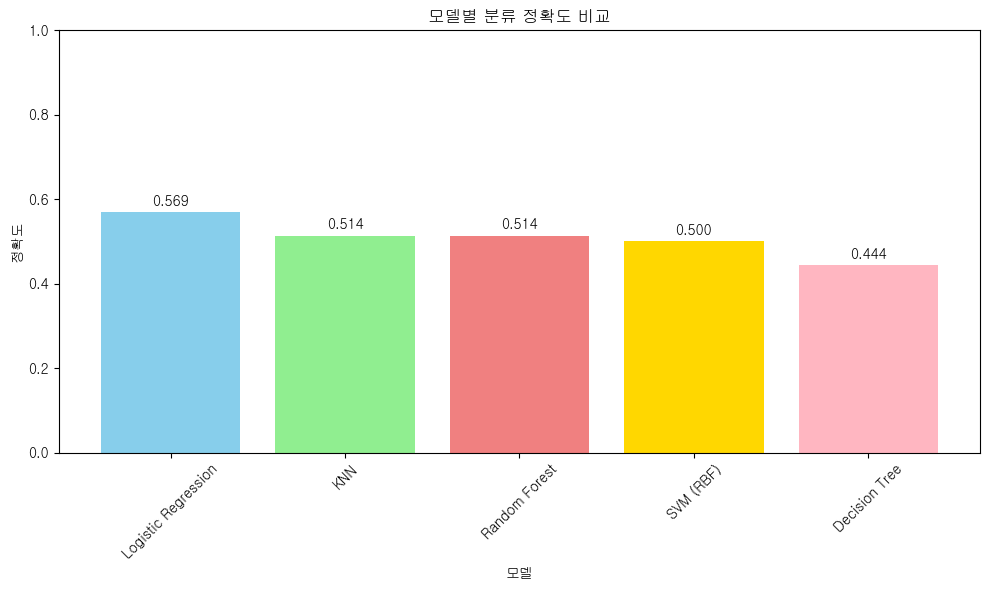

In [10]:
# 모델 성능 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('모델별 분류 정확도 비교')
plt.xlabel('모델')
plt.ylabel('정확도')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# 각 막대 위에 정확도 값 표시
for bar, accuracy in zip(bars, results_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()